# CO2 & GHG emissions compared to world population

[CO2 and GHG emission data](https://www.kaggle.com/srikantsahu/co2-and-ghg-emission-data): emission_data.csv
<br> <br>
[World Population 1960-2018](https://www.kaggle.com/imdevskp/world-population-19602018?select=pop_worldometer_data.csv): population_total_long.csv

Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sci

pd.options.display.float_format = '{:,.2f}'.format

Read emission data

In [2]:
emissions = pd.read_csv('emission_data.csv')

Delete years previous to 1900 (quite empty)

In [3]:
for i in range(1751,1900):
    emissions = emissions.drop(str(i),1)

Mean value for each year

In [4]:
print(emissions.mean())

1900      532,542,351.10
1901      555,225,826.15
1902      578,392,171.98
1903      603,437,277.44
1904      628,810,350.55
              ...       
2013   15,785,880,294.70
2014   16,175,428,211.45
2015   16,531,582,538.78
2016   16,919,309,582.78
2017   17,323,728,936.87
Length: 118, dtype: float64


This dataset contains the cumulative emissions value for each country, and for the globe itself. It's very useful, but just for a moment let's think about the single annual emissions. Does this number always grow, no matter what? <br>
Here we create a dataframe for the world, then we add two new columns: `Annual` and `Delta`. <br>
Annual represents the annual emissions, while delta helps us understand how each year went compared to the previous.

In [5]:
year_on_year = emissions[ emissions['Country'] == 'World']
year_on_year = pd.melt(year_on_year, ['Country'],var_name='Year',value_name='Emissions')
year_on_year[['Annual']] = 0
year_on_year.at[0, 'Annual'] = 0
for i in range(117,0,-1):
    annual = year_on_year.at[i,'Emissions'] - year_on_year.at[i-1,'Emissions']
    year_on_year.at[i, 'Annual'] = annual


year_on_year[['Delta']] = 0
year_on_year.at[0, 'Delta'] = 0
for i in range(117,0,-1):
    delta = year_on_year.at[i,'Annual'] - year_on_year.at[i-1,'Annual']
    year_on_year.at[i, 'Delta'] = delta
    
year_on_year.head(10)

,Country,Year,Emissions,Annual,Delta
0,World,1900,"44,821,067,136.00",0,0
1,World,1901,"46,839,037,120.00",2017969984,2017969984
2,World,1902,"48,908,134,560.00",2069097440,51127456
3,World,1903,"51,165,404,048.00",2257269488,188172048
4,World,1904,"53,446,628,768.00",2281224720,23955232
5,World,1905,"55,875,296,512.00",2428667744,147443024
6,World,1906,"58,426,162,320.00",2550865808,122198064
7,World,1907,"61,310,822,192.00",2884659872,333794064
8,World,1908,"64,086,525,696.00",2775703504,-108956368
9,World,1909,"66,971,819,440.00",2885293744,109590240


Now we can plot these new columns. As we can see, the annual emissions aren't always growing from one year to the other, but it's safe to say that the tendency is to increase. <br>
On the other hand, the year-on-year change always comes back to zero, or at least is always oscillating around it.

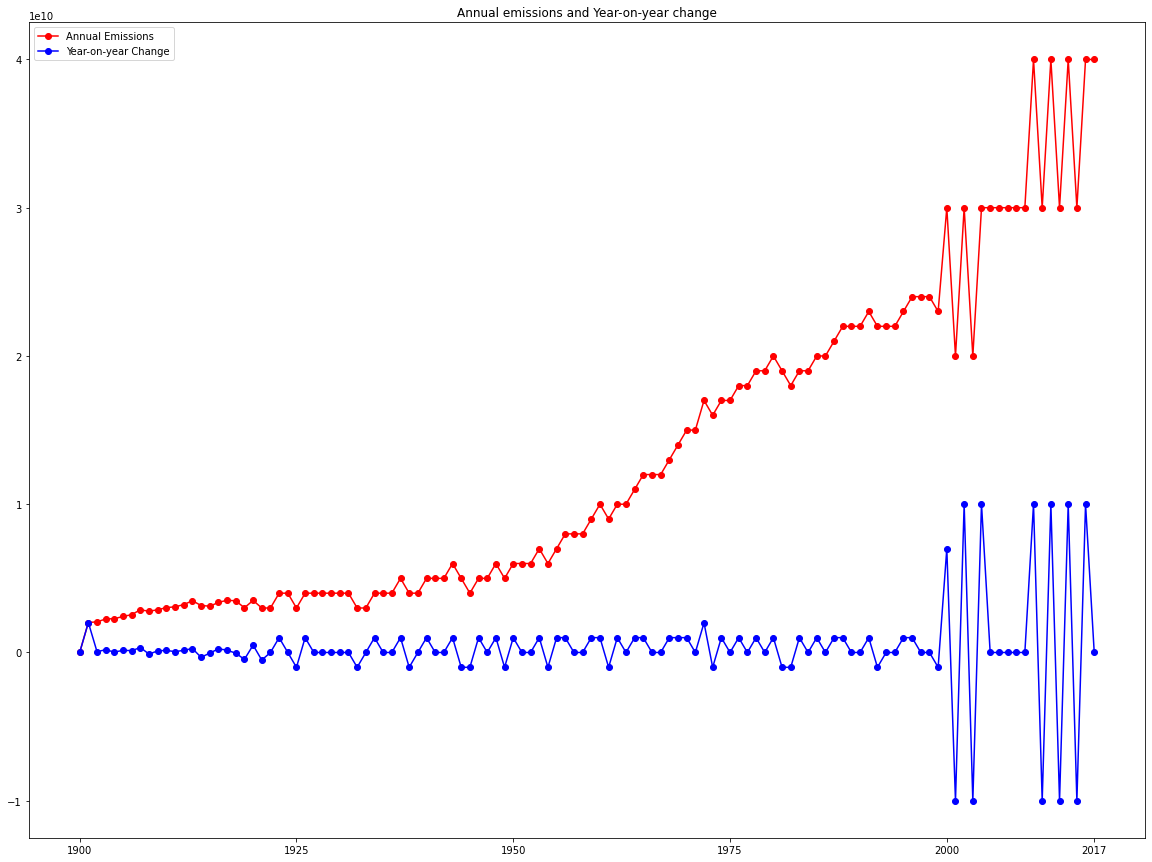

In [6]:
fig = plt.figure(figsize=(20,15))

plt.plot(year_on_year['Year'],year_on_year['Annual'],'r-o', label="Annual Emissions")
plt.plot(year_on_year['Year'],year_on_year['Delta'],'b-o', label="Year-on-year Change")

plt.legend()
plt.title('Annual emissions and Year-on-year change')

plt.xticks([0,25,50,75,100,117])
plt.show()

Let's take a look at the cumulative value for each country. It's in the last year of the dataset, 2017.

In [7]:
em_2017 = emissions[['Country','2017']]

In [8]:
em_2017 = em_2017.sort_values(by='2017')

Now print the 5 countries who have the less and most emissions.<br>
Note that the first and last value are skipped, the first because Kyrgysztan has zero reported emissions, the last because it represents the whole world.

In [9]:
print(em_2017[1:6],'\n')
print(em_2017.tail(6)[:5])

                       Country       2017
8          Antarctic Fisheries 153,888.00
215                     Tuvalu 256,923.00
155                       Niue 271,579.00
174               Saint Helena 346,309.00
226  Wallis and Futuna Islands 429,573.00 

                      Country               2017
72             Europe (other) 158,000,000,000.00
13   Asia and Pacific (other) 178,000,000,000.00
45                      China 200,000,000,000.00
64                      EU-28 353,000,000,000.00
220             United States 399,000,000,000.00


We can extract the data per year for each of those countries

In [10]:
world = emissions[ emissions['Country'] == 'World']

ue = emissions[ emissions['Country'] == 'EU-28']
usa = emissions[ emissions['Country'] == 'United States']
china = emissions[ emissions['Country'] == 'China']
asia = emissions[ emissions['Country'] == 'Asia and Pacific (other)']
europe = emissions[ emissions['Country'] == 'Europe (other)']

antarctic = emissions[ emissions['Country'] == 'Antarctic Fisheries']
tuvalu = emissions[ emissions['Country'] == 'Tuvalu']
niue = emissions[ emissions['Country'] == 'Niue']
helena = emissions[ emissions['Country'] == 'Saint Helena']
wallis = emissions[ emissions['Country'] == 'Wallis and Futuna Islands']

Using the `melt` function, it's very easy to create a tidy dataset that is long instead of wide

In [11]:
world2 = pd.melt(world, ['Country'],var_name='Year',value_name='Emissions')

ue2 = pd.melt(ue, ['Country'],var_name='Year',value_name='Emissions')
usa2 = pd.melt(usa, ['Country'],var_name='Year',value_name='Emissions')
china2 = pd.melt(china, ['Country'],var_name='Year',value_name='Emissions')
asia2 = pd.melt(asia, ['Country'],var_name='Year',value_name='Emissions')
europe2 = pd.melt(europe, ['Country'],var_name='Year',value_name='Emissions')

antarctic2 = pd.melt(antarctic, ['Country'],var_name='Year',value_name='Emissions')
tuvalu2 = pd.melt(tuvalu, ['Country'],var_name='Year',value_name='Emissions')
niue2 = pd.melt(niue, ['Country'],var_name='Year',value_name='Emissions')
helena2 = pd.melt(helena, ['Country'],var_name='Year',value_name='Emissions')
wallis2 = pd.melt(wallis, ['Country'],var_name='Year',value_name='Emissions')

Finally we can plot these data and visually see how different countries had different growth curves.

It's interesting to see in the first graph, which include the world data and the top emitters, how classic western countries (USA and European Union) started to grow earlier, and their curve is more similar to the global one.

The second graph is much more diverse, it appears clear that those country have far less emissions, and also that thay're probably still growing.

Note also that the `y` axes in the first graph is expressed in `1e12`, while in the second graph is in hundreds of thousands.

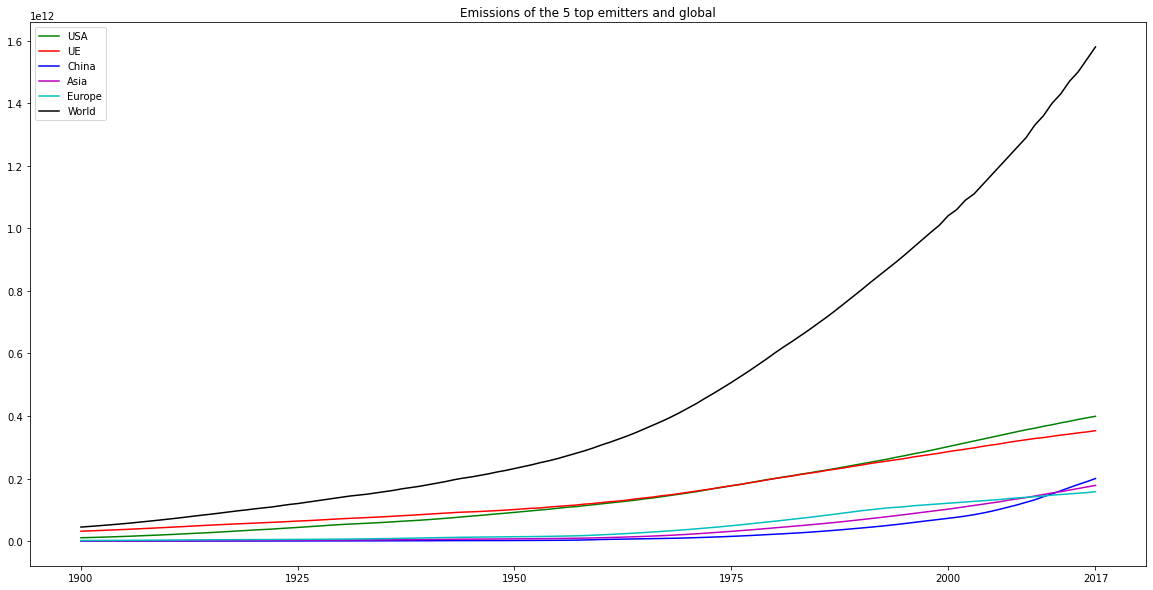

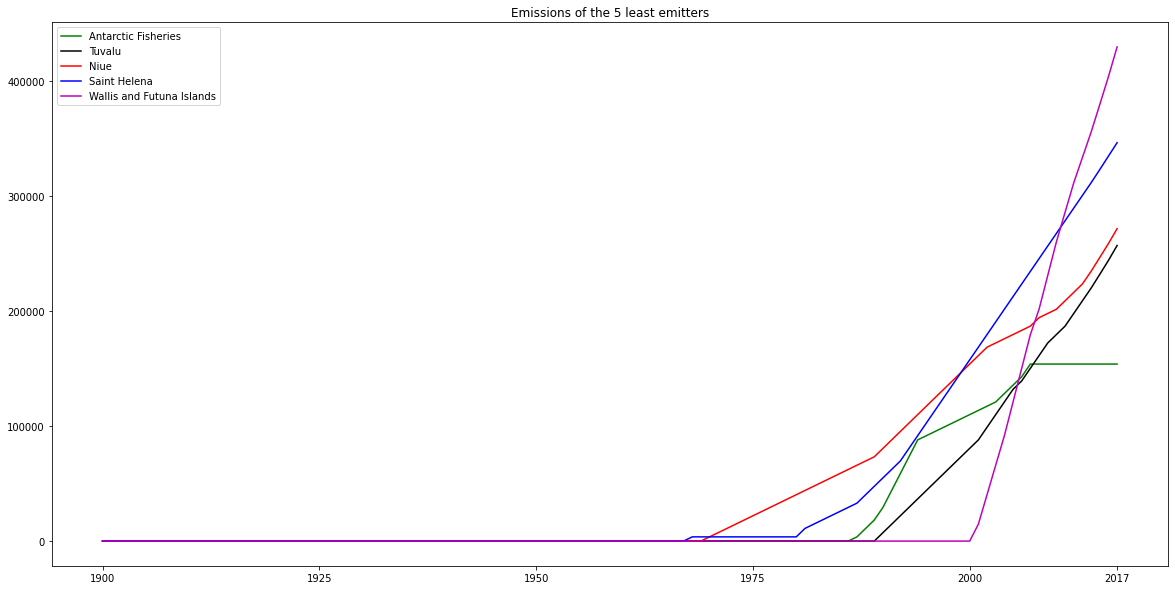

In [12]:
#TOP EMITTERS AND GLOBAL VALUE
fig = plt.figure(figsize=(20,10))

plt.plot(usa2['Year'],usa2['Emissions'],'g', label="USA")
plt.plot(ue2['Year'],ue2['Emissions'],'r', label="UE")
plt.plot(china2['Year'],china2['Emissions'],'b', label="China")
plt.plot(asia2['Year'],asia2['Emissions'],'m', label="Asia")
plt.plot(europe2['Year'],europe2['Emissions'],'c', label="Europe")
plt.plot(world2['Year'],world2['Emissions'],'k', label="World")

plt.legend()
plt.title('Emissions of the 5 top emitters and global')

plt.xticks([0,25,50,75,100,117])
plt.show()


#COUNTRIES WITH LESS EMISSIONS
fig = plt.figure(figsize=(20,10))

plt.plot(antarctic2['Year'],antarctic2['Emissions'],'g', label="Antarctic Fisheries")
plt.plot(tuvalu2['Year'],tuvalu2['Emissions'],'k', label="Tuvalu")
plt.plot(niue2['Year'],niue2['Emissions'],'r', label="Niue")
plt.plot(helena2['Year'],helena2['Emissions'],'b', label="Saint Helena")
plt.plot(wallis2['Year'],wallis2['Emissions'],'m', label="Wallis and Futuna Islands")


plt.legend()
plt.title('Emissions of the 5 least emitters')

plt.xticks([0,25,50,75,100,117])
plt.show()

Now personally I'd like to know if my suppositions are true: let's see how correlated are the following couples:<br>
<ul>
    <li>World - USA</li>
    <li>World - Tuvalu</li>
</ul>

##### World and USA: quite similar

In [13]:
corr, p = sci.pearsonr(world2['Emissions'], usa2['Emissions'])
print('Pearsons correlation: %.3f ' % corr)
print('p-value: %.5f \n' % p)

corr, p = sci.spearmanr(world2['Emissions'], usa2['Emissions'])
print('Spearmans correlation: %.3f ' % corr)
print('p-value: %.5f \n' % p)

coef, p = sci.kendalltau(world2['Emissions'], usa2['Emissions'])
print('Kendall correlation: %.3f ' % corr)
print('p-value: %.5f \n' % p)

Pearsons correlation: 0.991 
p-value: 0.00000 

Spearmans correlation: 1.000 
p-value: 0.00000 

Kendall correlation: 1.000 
p-value: 0.00000 



##### World and Tuvalu: somewhat different

In [14]:
corr, p = sci.pearsonr(world2['Emissions'], tuvalu2['Emissions'])
print('Pearsons correlation: %.3f ' % corr)
print('p-value: %.5f \n' % p)

corr, p = sci.spearmanr(world2['Emissions'], tuvalu2['Emissions'])
print('Spearmans correlation: %.3f ' % corr)
print('p-value: %.5f \n' % p)

coef, p = sci.kendalltau(world2['Emissions'], tuvalu2['Emissions'])
print('Kendall correlation: %.3f ' % corr)
print('p-value: %.5f \n' % p)

Pearsons correlation: 0.865 
p-value: 0.00000 

Spearmans correlation: 0.746 
p-value: 0.00000 

Kendall correlation: 0.746 
p-value: 0.00000 



Last but very useful step: from a messy dataset to a tidy one using `melt`. <br>
This transformation is required to proceed with our analysis, introducing a new source of data.

In [15]:
emissions = pd.melt(emissions,['Country'],var_name='Year',value_name='Emissions')

In [16]:
emissions.head()

,Country,Year,Emissions
0,Afghanistan,1900,0.00
1,Africa,1900,"31,942,752.00"
2,Albania,1900,0.00
3,Algeria,1900,0.00
4,Americas (other),1900,"317,500,256.00"


In [17]:
emissions.tail()

,Country,Year,Emissions
27253,Wallis and Futuna Islands,2017,"429,573.00"
27254,World,2017,"1,580,000,000,000.00"
27255,Yemen,2017,"619,432,763.00"
27256,Zambia,2017,"187,368,600.00"
27257,Zimbabwe,2017,"701,987,856.00"


## Population by country

Read from the file

In [18]:
population = pd.read_csv('population_total_long.csv')

The idea is to select, similarly to what we did before, the countries with most and least people in 2017. Then put this metric in relationship with their emissions.<br>
PS. San Marino wasn't on the `emissions` dataset, Gibraltar is chosen instead <br>
PPS. Brasil is chosen over Pakistan to help differentiate from all the asian countries

In [19]:
pop_2017 = population[ population['Year'] == 2017]
pop_2017 = pop_2017.sort_values(by='Count')
print(pop_2017.head(6))
print('\n')
print(pop_2017.tail(6))

                 Country Name  Year  Count
12576                  Tuvalu  2017  11370
12524                   Nauru  2017  12876
12531                   Palau  2017  17808
12585  British Virgin Islands  2017  29577
12552              San Marino  2017  33671
12448               Gibraltar  2017  33728


        Country Name  Year       Count
12403         Brazil  2017   207833831
12527       Pakistan  2017   207896686
12464      Indonesia  2017   264645886
12581  United States  2017   325147121
12466          India  2017  1338658835
12413          China  2017  1386395000


In [20]:
pop_2017.loc[pop_2017['Country Name'] == 'Tuvalu']

,Country Name,Year,Count
12576,Tuvalu,2017,11370


Get all the emissions DataFrames for each of the countries selected.

In [21]:
em_china = emissions.loc[emissions['Country'] == 'China']
em_india = emissions.loc[emissions['Country'] == 'India']
em_usa = emissions.loc[emissions['Country'] == 'United States']
em_indonesia = emissions.loc[emissions['Country'] == 'Indonesia']
em_brazil = emissions.loc[emissions['Country'] == 'Brazil']


em_tuvalu = emissions.loc[emissions['Country'] == 'Tuvalu']
em_nauru = emissions.loc[emissions['Country'] == 'Nauru']
em_palau = emissions.loc[emissions['Country'] == 'Palau']
em_virgin = emissions.loc[emissions['Country'] == 'British Virgin Islands']
em_gibraltar = emissions.loc[emissions['Country'] == 'Gibraltar']

By selecting only the tail we align those data with the population one (starting in 1960)

In [22]:
em_china = em_china.tail(58)
em_india = em_india.tail(58)
em_usa = em_usa.tail(58)
em_indonesia = em_indonesia.tail(58)
em_brazil = em_brazil.tail(58)


em_tuvalu = em_tuvalu.tail(58)
em_nauru = em_nauru.tail(58)
em_palau = em_palau.tail(58)
em_virgin = em_virgin.tail(58)
em_gibraltar = em_gibraltar.tail(58)

Now, let's gather the population info of these countries, and keep only the count `Series`

In [23]:
pop_china = population.loc[population['Country Name'] == 'China']
pop_india = population.loc[population['Country Name'] == 'India']
pop_usa = population.loc[population['Country Name'] == 'United States']
pop_indonesia = population.loc[population['Country Name'] == 'Indonesia']
pop_brazil = population.loc[population['Country Name'] == 'Brazil']

pop_tuvalu = population.loc[population['Country Name'] == 'Tuvalu']
pop_nauru = population.loc[population['Country Name'] == 'Nauru']
pop_palau = population.loc[population['Country Name'] == 'Palau']
pop_virgin = population.loc[population['Country Name'] == 'British Virgin Islands']
pop_gibraltar = population.loc[population['Country Name'] == 'Gibraltar']

In [24]:
count_china = pop_china[['Count']]
count_india = pop_india[['Count']]
count_usa = pop_usa[['Count']]
count_indonesia = pop_indonesia[['Count']]
count_brazil = pop_brazil[['Count']]

count_tuvalu = pop_tuvalu[['Count']]
count_nauru = pop_nauru[['Count']]
count_palau = pop_palau[['Count']]
count_virgin = pop_virgin[['Count']]
count_gibraltar = pop_gibraltar[['Count']]

Finally it's time to concat emissions and population!

In [25]:
tot_china = pd.concat([em_china.reset_index(drop=True),count_china.reset_index(drop=True)], axis=1)
tot_india = pd.concat([em_india.reset_index(drop=True),count_india.reset_index(drop=True)], axis=1)
tot_usa = pd.concat([em_usa.reset_index(drop=True),count_usa.reset_index(drop=True)], axis=1)
tot_indonesia = pd.concat([em_indonesia.reset_index(drop=True),count_indonesia.reset_index(drop=True)], axis=1)
tot_brazil = pd.concat([em_brazil.reset_index(drop=True),count_brazil.reset_index(drop=True)], axis=1)


tot_tuvalu = pd.concat([em_tuvalu.reset_index(drop=True),count_tuvalu.reset_index(drop=True)], axis=1)
tot_nauru = pd.concat([em_nauru.reset_index(drop=True),count_nauru.reset_index(drop=True)], axis=1)
tot_palau = pd.concat([em_palau.reset_index(drop=True),count_palau.reset_index(drop=True)], axis=1)
tot_virgin = pd.concat([em_virgin.reset_index(drop=True),count_virgin.reset_index(drop=True)], axis=1)
tot_gibraltar = pd.concat([em_gibraltar.reset_index(drop=True),count_gibraltar.reset_index(drop=True)], axis=1)

In [26]:
tot_brazil.head()

,Country,Year,Emissions,Count
0,Brazil,1960,"588,269,253.00",72179226
1,Brazil,1961,"637,413,757.00",74311343
2,Brazil,1962,"691,045,205.00",76514328
3,Brazil,1963,"746,596,143.00",78772657
4,Brazil,1964,"803,262,819.00",81064571


In [27]:
tot_palau.tail()

,Country,Year,Emissions,Count
53,Palau,2013,"9,874,480.00",17606
54,Palau,2014,"10,134,624.00",17626
55,Palau,2015,"10,418,513.00",17665
56,Palau,2016,"10,705,654.00",17725
57,Palau,2017,"11,012,245.00",17808


## Last but not Least
The following graphs show us some very interesting stuff: <br>
<ul>
    <li> <b>First graph</b><br>
Here we can see how the population grew for the 5 most populated countries. China and India have seen by far the most rapid growth. <br>
But what is even more shocking are the emissions. Each point represents the population of his respective country in a certain year, as the point gets bigger the more emissions the country has. It's absurd how the USA have had so many emissions for such a long time, while having a "not-so-big" population.
<br>
<br>
    <li> <b>Second graph</b><br>
And precisely that assumpion from the first graph is what inspired the second. How much difference there is between these countries if we analyze the emissions pro-capita? Well well... not much difference, if we ignore the USA...
</ul>

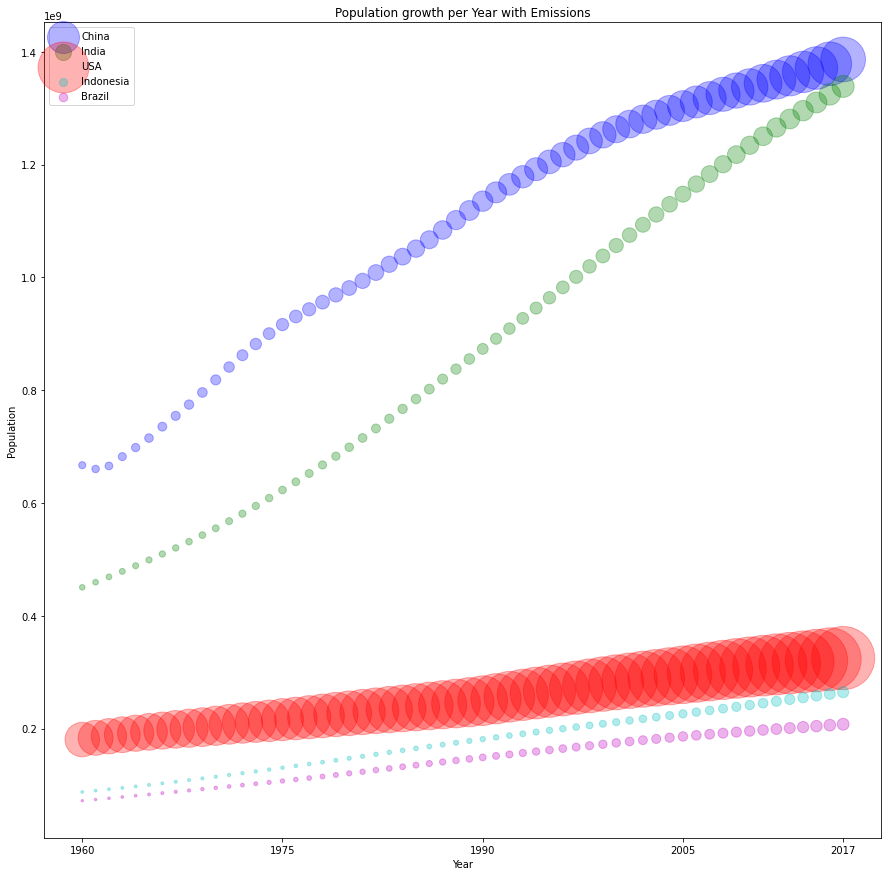

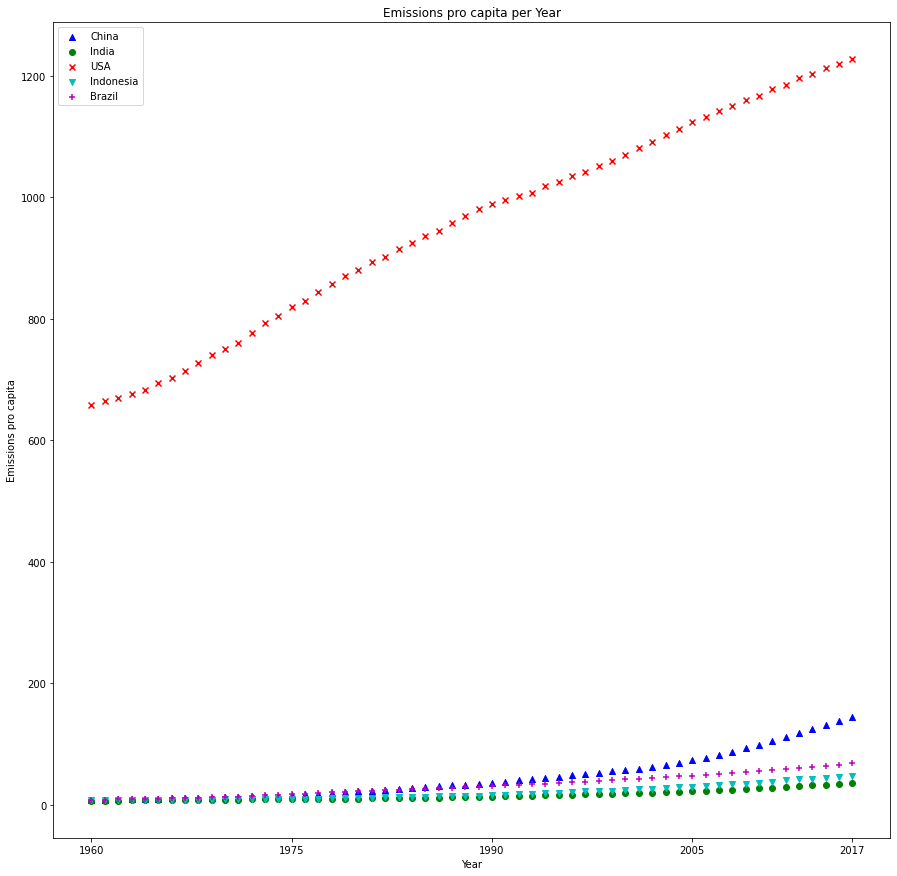

In [28]:
#MOST POPULATED COUNTRIES WITH SCATTER SIZE = EMISSIONS
fig = plt.figure(figsize=(15,15))

plt.scatter(tot_china['Year'], tot_china['Count'], tot_china['Emissions']/100000000, c='b', alpha=0.3, label="China")
plt.scatter(tot_india['Year'],tot_india['Count'], tot_india['Emissions']/100000000, c='g', alpha=0.3, label="India")
plt.scatter(tot_usa['Year'],tot_usa['Count'], tot_usa['Emissions']/100000000, c='r', alpha=0.3, label="USA")
plt.scatter(tot_indonesia['Year'],tot_indonesia['Count'], tot_indonesia['Emissions']/100000000, c='c', alpha=0.3, label="Indonesia")
plt.scatter(tot_brazil['Year'],tot_brazil['Count'], tot_brazil['Emissions']/100000000, c='m', alpha=0.3, label="Brazil")

plt.legend()

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population growth per Year with Emissions')

plt.xticks([0,15, 30, 45, 57])

plt.show()




#MOST POPULATED COUNTRIES AND EMISSIONS PRO CAPITA
fig = plt.figure(figsize=(15,15))

tot_china_procapita = tot_china['Emissions'] / tot_china['Count']
tot_india_procapita = tot_india['Emissions'] / tot_india['Count']
tot_usa_procapita = tot_usa['Emissions'] / tot_usa['Count']
tot_indonesia_procapita = tot_indonesia['Emissions'] / tot_indonesia['Count']
tot_brazil_procapita = tot_brazil['Emissions'] / tot_brazil['Count']

plt.scatter(tot_china['Year'],tot_china_procapita,c='b', marker='^',label="China")
plt.scatter(tot_india['Year'],tot_india_procapita,c='g',marker='o', label="India")
plt.scatter(tot_usa['Year'],tot_usa_procapita,c='r',marker='x', label="USA")
plt.scatter(tot_indonesia['Year'],tot_indonesia_procapita,c='c', marker='v',label="Indonesia")
plt.scatter(tot_brazil['Year'],tot_brazil_procapita,c='m',marker='+',label="Brazil")

plt.legend()

plt.xlabel('Year')
plt.ylabel('Emissions pro capita')
plt.title('Emissions pro capita per Year')

plt.xticks([0,15, 30, 45, 57])

plt.show()


Here we do the same thing, over the 5 least populated countries: <br>
<ul>
    <li> <b>First graph</b><br>
We can observe that the graph is very different from the one above. Here every country has seen a rising in his population as well as in the emissions it produces. The two most extreme cases are Tuvalu, which emits so little even compared to similar countries, and the British Virgin Islands that have seen a massive growth in population, with a consequential increase in emissions.
<br>
<br>
    <li> <b>Second graph</b><br>
This one confirms that Palau is the biggest emitter pro-capita, having similar emissions to Gibraltar but half of the population. And again, Tuvalu confirm itself as the most "green" country, being not only the country with less emissions, but also the one that has, by far, the lowest emissions pro-capita ratio.
</ul>

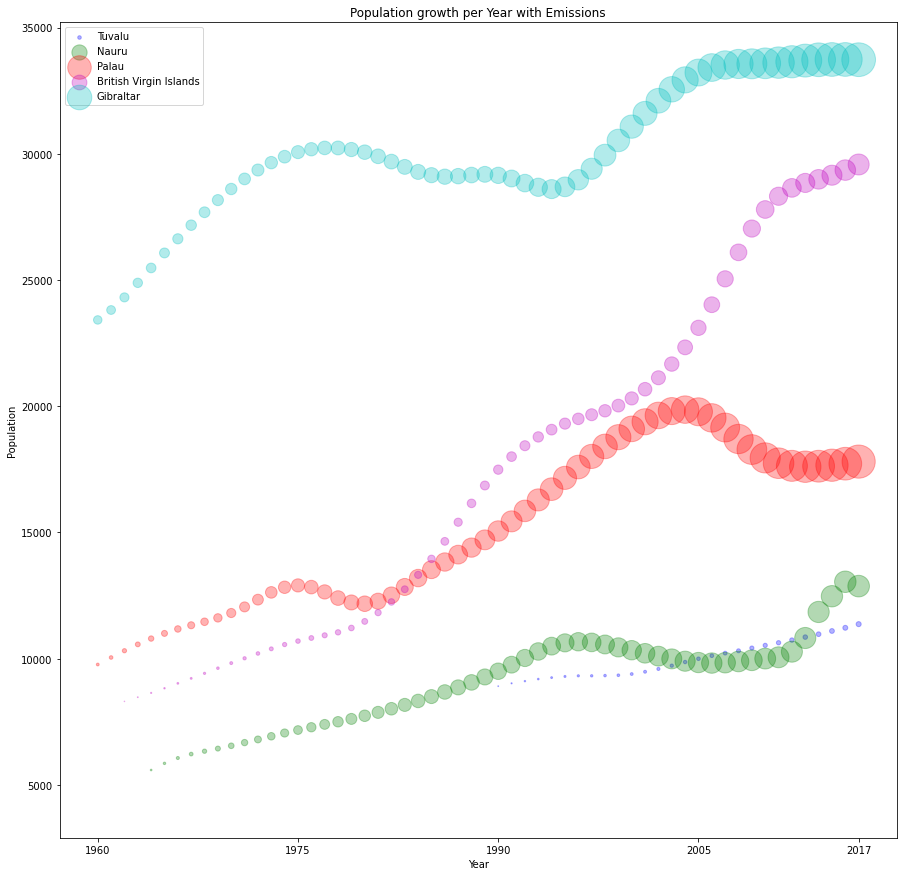

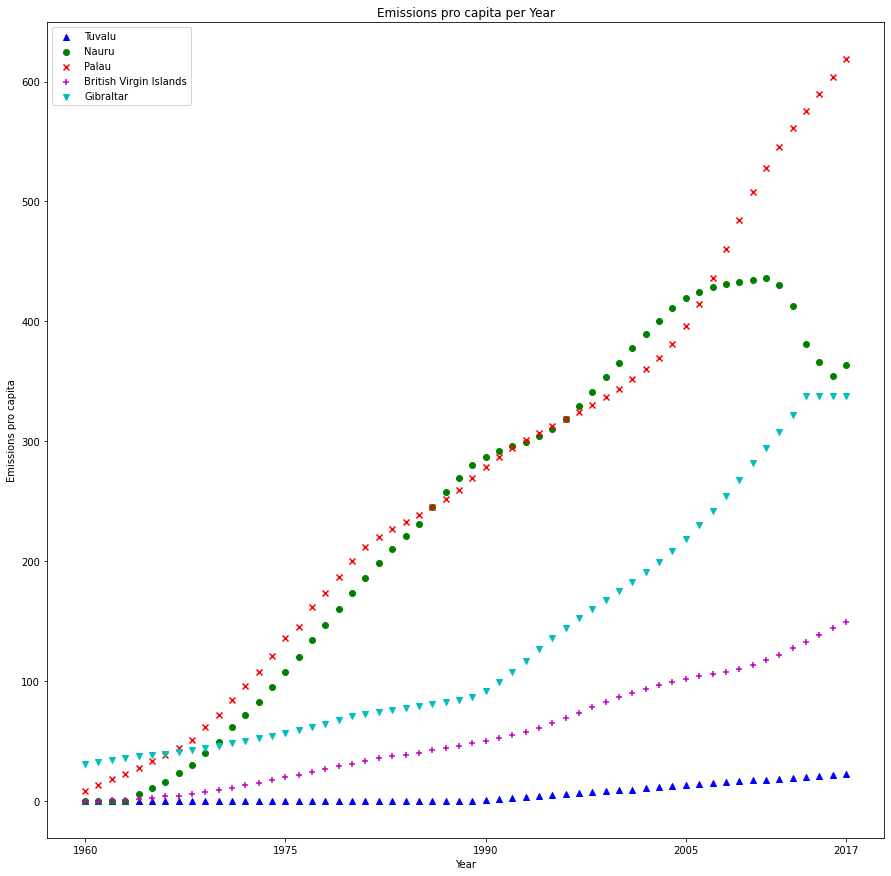

In [29]:
#LEAST POPULATED COUNTRIES WITH SCATTER SIZE = EMISSIONS
fig = plt.figure(figsize=(15,15))

plt.scatter(tot_tuvalu['Year'], tot_tuvalu['Count'], tot_tuvalu['Emissions']/10000, c='b', alpha=0.3, label="Tuvalu")
plt.scatter(tot_nauru['Year'],tot_nauru['Count'], tot_nauru['Emissions']/10000, c='g', alpha=0.3, label="Nauru")
plt.scatter(tot_palau['Year'],tot_palau['Count'], tot_palau['Emissions']/10000, c='r', alpha=0.3, label="Palau")
plt.scatter(tot_virgin['Year'],tot_virgin['Count'], tot_virgin['Emissions']/10000, c='m', alpha=0.3, label="British Virgin Islands")
plt.scatter(tot_gibraltar['Year'],tot_gibraltar['Count'], tot_gibraltar['Emissions']/10000, c='c', alpha=0.3, label="Gibraltar")

plt.legend()

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population growth per Year with Emissions')

plt.xticks([0,15, 30, 45, 57])

plt.show()




#LEAST POPULATED COUNTRIES AND EMISSIONS PRO CAPITA
fig = plt.figure(figsize=(15,15))

tot_tuvalu_procapita = tot_tuvalu['Emissions'] / tot_tuvalu['Count']
tot_nauru_procapita = tot_nauru['Emissions'] / tot_nauru['Count']
tot_palau_procapita = tot_palau['Emissions'] / tot_palau['Count']
tot_virgin_procapita = tot_virgin['Emissions'] / tot_virgin['Count']
tot_gibraltar_procapita = tot_gibraltar['Emissions'] / tot_gibraltar['Count']

plt.scatter(tot_tuvalu['Year'],tot_tuvalu_procapita,c='b', marker='^',label="Tuvalu")
plt.scatter(tot_nauru['Year'],tot_nauru_procapita,c='g',marker='o', label="Nauru")
plt.scatter(tot_palau['Year'],tot_palau_procapita,c='r',marker='x', label="Palau")
plt.scatter(tot_virgin['Year'],tot_virgin_procapita,c='m',marker='+',label="British Virgin Islands")
plt.scatter(tot_gibraltar['Year'],tot_gibraltar_procapita,c='c', marker='v',label="Gibraltar")

plt.legend()

plt.xlabel('Year')
plt.ylabel('Emissions pro capita')
plt.title('Emissions pro capita per Year')


plt.xticks([0,15, 30, 45, 57])

plt.show()